<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_interpol_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sympy as sym
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
xa = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
ya = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
N = len(ya)
## V se puede calcular con
## np.vander(x,N) o bien
V = np.column_stack([xa**(N-1-i)\
    for i in range(0,N)])
#print('Matriz Vandermonde\n',V)
a = np.dot(np.linalg.inv(V),ya)
print('coeficientes son ' ,a )

coeficientes son  [-3.06868163e-11  4.27169334e-09 -2.76799855e-07  1.10890853e-05
 -3.07668733e-04  6.27634474e-03 -9.75485634e-02  1.18119998e+00
 -1.13010513e+01  8.61420059e+01 -5.25173833e+02  2.56121111e+03
 -9.95779958e+03  3.06444753e+04 -7.37894090e+04  1.36639461e+05
 -1.89664256e+05  1.89812920e+05 -1.28562921e+05  5.24144633e+04
 -9.64408948e+03]


In [0]:
res = lambda x: a[0]*x**20 + a[1]*x**19 +a[2]*x**18+a[3]*x**17+a[4]*x**16+a[5]*x**15+\
                a[6]*x**14 + a[7]*x**13 +a[8]*x**12+a[9]*x**11+a[10]*x**10+a[11]*x**9+\
                a[12]*x**8 + a[13]*x**7 +a[14]*x**6+a[15]*x**5+a[16]*x**4+a[17]*x**3+\
                a[18]*x**2 + a[19]*x +a[20]

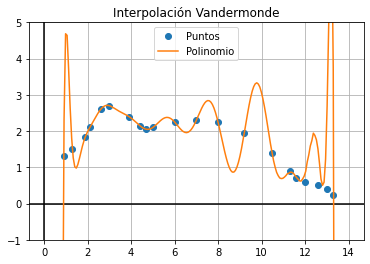

In [0]:
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Interpolación Vandermonde')
plt.plot(xa,ya,'o', label = 'Puntos')
bottom, top = -1,5  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
xnew = np.linspace(0,14,200)
ynew = res(xnew)
plt.plot(xnew,ynew, label = 'Polinomio')
plt.legend()
plt.show()

In [0]:
import sympy as sym
def lagrange(xa,ya):
    n = len(xa)
    x = sym.Symbol('x')
# Polinomio
    polinomio = 0
    for i in range(0,n,1):
    # Termino de Lagrange
        termino = 1
        for j  in range(0,n,1):
            if (j!=i):
                termino = termino*(x-xa[j])/(xa[i]-xa[j])
        polinomio = polinomio + termino*ya[i]
    pxn = sym.lambdify(x,polinomio) #convertimos a función evaluable
    return polinomio,pxn

In [0]:
#  Datos de prueba
xi = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
yi = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
poli,polifun =lagrange(xi,yi)
px = poli.expand() #expandimos para evaluación numérica
px


-3.07453078010798e-11*x**20 + 4.27948927144623e-9*x**19 - 2.77283085046607e-7*x**18 + 1.11075895423636e-5*x**17 - 0.000308159189308451*x**16 + 0.00628589966751693*x**15 - 0.0976903800730415*x**14 + 1.18284031649908*x**13 - 11.3160515558669*x**12 + 86.2513979924895*x**11 - 525.812753506644*x**10 + 2564.20130819603*x**9 - 9968.97885733132*x**8 + 30677.6349740652*x**7 - 73866.565678464*x**6 + 136777.900226634*x**5 - 189850.972861717*x**4 + 189994.993238076*x**3 - 128683.405779065*x**2 + 52462.5803287042*x - 9652.78507912568

In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
       2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25])

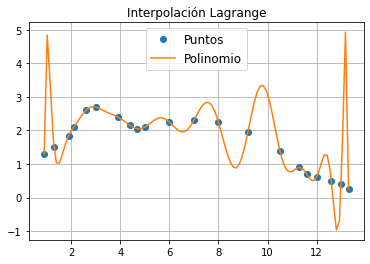

In [0]:
# Puntos para la gráfica
a = np.min(xi)
b = np.max(xi)
muestras = 101
xi_p = np.linspace(a,b,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper center',fontsize=12)
plt.show()

In [0]:
def newton_dif_div(x, y):
    """
    Calcula los coeficientes de las diferencias divididas de Newton
    y el polinomio correspondiente
    Parametros:
            x: Array con los valores x
            y: Array con los valores y
    Salida:
            f: Array que contiene los coeficientes del polinomio
            interpolante calculados mediante las diferencias divididas
    """

    n = x.size
    q = np.zeros((n, n - 1))
    # Insert 'y' in the first column of the matrix 'q'
    q = np.concatenate((y[:, None], q), axis=1)
    

    for i in range(1, n):
        for j in range(1, i + 1):
            q[i, j] = (q[i, j - 1] - q[i - 1, j - 1]) / (x[i] - x[i - j])

    # Copy the diagonal values of the matrix q to the vector f
    #print("Mariz de diferencias divididas\n")
    #print(q,'\n')
    f = np.zeros(n)
    for i in range(0, n):
        f[i] = q[i, i]

    # Prints the polynomial
    #print("Vector de coeficientes\n")
    #print(f,'\n')
    print("El polinomio es:")
    print("p(x)={:+.4f}".format(f[0]), end="")
    for i in range(1, n):
        print("{:+.4f}".format(f[i]), end="")
        for j in range(0, i):
            print("(x{:+.4f})".format(x[j] * -1), end="")
    print("")
    return f

In [0]:
def evalPoly(a,xData,x):
    n = len(xData) - 1  # grado de polinomio a evaluar
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

In [0]:
xi = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
yi = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
c = newton_dif_div(xi,yi)

El polinomio es:
p(x)=+1.3000+0.5000(x-0.9000)+0.0833(x-0.9000)(x-1.3000)+0.6250(x-0.9000)(x-1.3000)(x-1.9000)-0.9063(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)+0.5668(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)-0.1839(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)+0.0387(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)-0.0025(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)-0.0019(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)(x-4.7000)+0.0006(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)(x-4.7000)(x-5.0000)-0.0000(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)(x-4.7000)(x-5.0000)(x-6.0000)-0.0000(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)(x-4.7000)(x-5.0000)(x-6.0000)(x-7.0000)+0.0000(x-0.9000)(x-1.3000)(x-1.9000)(x-2.1000)(x-2.6000)(x-3.0000)(x-3.9000)(x-4.4000)(x-4.7000)(x-5.0000)

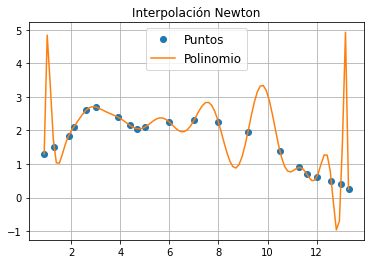

In [0]:
# Puntos para la gráfica
a = np.min(xi)
b = np.max(xi)
muestras = 101
xi_p = np.linspace(a,b,muestras)
yi_p = evalPoly(c,xi,xi_p)
plt.grid(True)
plt.title('Interpolación Newton')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper center',fontsize=12)
plt.show()

In [0]:
def SplineCubico(p,q):
    
    n = len(p)-1
       
    # Inicializar vectores auxiliares
    A = q
    X = p
    
    H =[0.0 for x	in	range(n)]
    B =[0.0 for	x	in	range(n+1)]
    C =[0.0 for	x	in	range(n+1)]
    D =[0.0 for	x	in	range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    l =[1.0	for	x	in	range(n+1)]
    z =[0.0	for	x	in	range(n+1)]
    # Crear vector H
    for i in range(n):
        H[i] = X [i+1] -X [i]
    # Crear vector a
    for i in range(1, n):
        alpha [i] = (3.0/H [i])*(A [i+1]-A[i])-(3.0/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n) :
        l[i] = 2.0*(X[i+1]-X[i-1] )-H[i-1] *mu[i-1]
        mu[i] = float(H [i])/l[i]
        z[i] = (alpha [i]-H [i-1] *z [i-1] )/float(l[i] )

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z [j] -mu[j] *C [j+1]
        B [j] = (A [j + 1] - A [j] )/float (H [j] )-H [j] * (C [j + 1] +2*C [j] )/3.0
        D[j] = (C[j+1] -C[j])/(3.0*H[j])

    # Retornar vectores A, B, C, D
    
    x = sym.Symbol('x')
    polinomio = []
    
    for j in range(0,n,1):  # construimos polinomio por tramos
        ptramo = A[j]+ B[j]*(x-X[j])+ C[j]*(x-X[j])**2 + D[j]*(x-X[j])**3
        ptramo = ptramo.expand()
        polinomio.append(ptramo)
        #print(ptramo)
    
    return polinomio

In [0]:
xi = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
fi = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
poli = SplineCubico(xi,fi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

Polinomios por tramos: 
 x = [0.9,1.3]
-0.247649057851442*x**3 + 0.668652456198893*x**2 - 0.0621633613227736*x + 0.994874698843094
 x = [1.3,1.9]
0.946912093052316*x**3 - 3.99013603232576*x**2 + 5.99426167375928*x - 1.62957614969246
 x = [1.9,2.1]
-2.95638245731127*x**3 + 18.2586429047467*x**2 - 36.2784183066783*x + 25.1431211712513
 x = [2.1,2.6]
-0.44663477948969*x**3 + 2.44723253447072*x**2 - 3.07445652909884*x + 1.90034792694571
 x = [2.6,3.0]
0.445051100759695*x**3 - 4.50791733147448*x**2 + 15.0089331223587*x - 13.7719231043175
 x = [3.0,3.9]
0.174159870143963*x**3 - 2.06989625593289*x**2 + 7.6948698957339*x - 6.4578598776927
 x = [3.9,4.4]
0.0780756539915195*x**3 - 0.945710926949304*x**2 + 3.31054711269792*x - 0.75824025974592
 x = [4.4,4.7]
1.31417128415048*x**3 - 17.2621732450475*x**2 + 75.1029813123302*x - 106.053810419207
 x = [4.7,5.0]
-1.58121890345516*x**3 + 23.562828400192*x**2 - 116.774526420296*x + 194.554285028574
 x = [5.0,6.0]
0.0431153291484715*x**3 - 0.802185088862

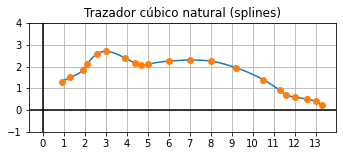

In [0]:
# GRAFICA
# Puntos para grafica en cada tramo
xtrazado = np.array([])
ytrazado = np.array([])
resolucion = 10 # entre cada par de puntos
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,resolucion)
    
    ptramo = poli[tramo-1]
    pxtramo = sym.lambdify('x',ptramo)
    ytramo = pxtramo(xtramo)
    
    xtrazado = np.concatenate((xtrazado,xtramo))
    ytrazado = np.concatenate((ytrazado,ytramo))
    tramo = tramo + 1

# Gráfica

plt.figure(figsize = (5.5,2) )
bottom, top = -1,4  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
xnew = np.linspace(0,14,200)



plt.xticks(np.arange(0, 14, 1.0))
plt.grid(True)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Trazador cúbico natural (splines)')
plt.plot(xtrazado,ytrazado)
plt.plot(xi,fi,'o')
plt.show()

<img src="https://drive.google.com/uc?id=1FrgXHrGMRoo4U4zZyWwPAIWzoTzCT9c5" alt="Lamp" width="420" height="320">

## Ejercicios Interpolación

### En todos los casos dibujar el poolinomio interpolante

### 1.- La siguiente figura muestra un pato malvasia en vuelo. Para aproximar el perfil superior del pato hemos seleccionado puntos a lo largo de la curva por los cuales queremos que pase la curva de interpolación. La tabla a continuación enumera las coordenadas de 21 puntos de datos relativos al sistema de coordenadas superpuesto que se muestra en la figura. Observe que se usan más puntos cuando la curva cambia rápidamente que cuando lo hace más despacio.

<img src="https://drive.google.com/uc?id=1M-Md8b-oRVEBdQfwRY3vQYKDebQIhIMX" alt="Lamp" >

Obtener el polinomio interpolante del perfil superior del pato mediante:
Vandermonde <br>
Legendre <br>
Newton <br>
Splines cúbicos <br>

Dibujar cada uno y ver si se aproxima o no a la figura.

### 2,. La siguiente tabla muestra el coeficiente de rozamiento de una esfera  cD  como una función del número de Reynolds Re. Encontrar un polinomio interpolador por los 4 métodos vistos en clase y decidir cuál proporciona los mejores resultados (mirar las gráficas). A partir de ahí encontrar  cD para Re = 5, 50, 500, y 5, 000.  (Es posible que sea conveniente utilizar una escala log-log.






Re	0.2,	 2,	   20,	200,	  2000,	  20000 <br>
CD	103,	13.9,	2.72,	0.800,	0.401,	0.433

=> 5.0 &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.90159241175<br>
=> 50.0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.59083540468 <br>
=> 500.0 &nbsp;&nbsp;&nbsp;&nbsp;0.557433520352 <br>
=> 5000.0 &nbsp;&nbsp;0.38682177204

In [0]:
xi = np.log10(np.array([0.2, 2, 20, 200, 2000, 20000 ]))
fi = np.log10(([103, 13.9, 2.72, 0.800, 0.401, 0.433]))


In [0]:
poli = SplineCubico(xi,fi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

Polinomios por tramos: 
 x = [-0.6989700043360187,0.3010299956639812]
0.0333752390710933*x**3 + 0.0699848729947133*x**2 - 0.8542803365416*x + 1.3929263980007
 x = [0.3010299956639812,1.3010299956639813]
-0.00549966712428641*x**3 + 0.105092411525012*x**2 - 0.864848758713148*x + 1.3939868686942
 x = [1.3010299956639813,2.3010299956639813]
0.00421388037251329*x**3 + 0.0671795615520823*x**2 - 0.815523003677259*x + 1.37259543974071
 x = [2.3010299956639813,3.3010299956639813]
0.0432104691270858*x**3 - 0.20201739980645*x**2 - 0.196092720849678*x + 0.897486219404412
 x = [3.3010299956639813,4.301029995663981]
-0.075299921446406*x**3 + 0.971601662436402*x**2 - 4.07024444879636*x + 5.1603832399729


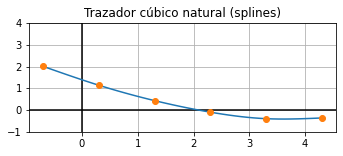

In [0]:
# GRAFICA
# Puntos para grafica en cada tramo
xtrazado = np.array([])
ytrazado = np.array([])
resolucion = 10 # entre cada par de puntos
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,resolucion)
    
    ptramo = poli[tramo-1]
    pxtramo = sym.lambdify('x',ptramo)
    ytramo = pxtramo(xtramo)
    
    xtrazado = np.concatenate((xtrazado,xtramo))
    ytrazado = np.concatenate((ytrazado,ytramo))
    tramo = tramo + 1

# Gráfica

plt.figure(figsize = (5.5,2) )
bottom, top = -1,4  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
xnew = np.linspace(0,14,200)



plt.xticks(np.arange(0, 14, 1.0))
plt.grid(True)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Trazador cúbico natural (splines)')
plt.plot(xtrazado,ytrazado)
plt.plot(xi,fi,'o')
plt.show()

In [0]:
xa = np.log10(np.array([0.2, 2, 20, 200, 2000, 20000 ]))
ya = np.log10(([103, 13.9, 2.72, 0.800, 0.401, 0.433]))
print(xa)
print(ya)
c = newton_dif_div(xa,ya)

[-0.69897  0.30103  1.30103  2.30103  3.30103  4.30103]
[ 2.01283722  1.1430148   0.4345689  -0.09691001 -0.39685563 -0.3635121 ]
El polinomio es:
p(x)=+2.0128-0.8698(x+0.6990)+0.0807(x+0.6990)(x-0.3010)+0.0026(x+0.6990)(x-0.3010)(x-1.3010)+0.0016(x+0.6990)(x-0.3010)(x-1.3010)(x-2.3010)+0.0001(x+0.6990)(x-0.3010)(x-1.3010)(x-2.3010)(x-3.3010)


In [0]:
yi_p = evalPoly(c,xa,xa)
yi_p

array([ 2.01283722,  1.1430148 ,  0.4345689 , -0.09691001, -0.39685563,
       -0.3635121 ])

In [0]:
xi_p = np.linspace(-1,5,100)
yi_p = evalPoly(c,xa,xi_p)
yi_p

array([ 2.30789507e+00,  2.24717840e+00,  2.18713081e+00,  2.12774496e+00,
        2.06901377e+00,  2.01093045e+00,  1.95348853e+00,  1.89668182e+00,
        1.84050445e+00,  1.78495088e+00,  1.73001587e+00,  1.67569453e+00,
        1.62198231e+00,  1.56887498e+00,  1.51636869e+00,  1.46445994e+00,
        1.41314558e+00,  1.36242285e+00,  1.31228937e+00,  1.26274312e+00,
        1.21378250e+00,  1.16540630e+00,  1.11761370e+00,  1.07040432e+00,
        1.02377816e+00,  9.77735687e-01,  9.32277775e-01,  8.87405743e-01,
        8.43121354e-01,  7.99426826e-01,  7.56324834e-01,  7.13818519e-01,
        6.71911494e-01,  6.30607851e-01,  5.89912169e-01,  5.49829519e-01,
        5.10365469e-01,  4.71526097e-01,  4.33317989e-01,  3.95748255e-01,
        3.58824528e-01,  3.22554974e-01,  2.86948299e-01,  2.52013757e-01,
        2.17761152e-01,  1.84200849e-01,  1.51343779e-01,  1.19201447e-01,
        8.77859367e-02,  5.71099191e-02,  2.71866580e-02, -1.96998285e-03,
       -3.03455329e-02, -

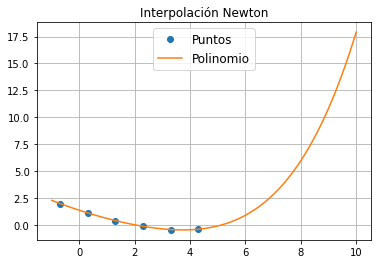

In [0]:
# Puntos para la gráfica
a = np.min(xa)
b = np.max(xa)
muestras = 101
xi_p = np.linspace(-1,10,100)
yi_p = evalPoly(c,xa,xi_p)
plt.grid(True)
plt.title('Interpolación Newton')
plt.plot(xa,ya,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper center',fontsize=12)
plt.show()

In [0]:
val1 = evalPoly(c,xa,np.log10(5))
val1 = 10**val1
val1

6.944960610846618

In [0]:
val2 = evalPoly(c,xa,np.log10(50))
val2 = 10**val2
val2

1.584114238092433

In [0]:
val3 = evalPoly(c,xa,np.log10(500))
val3 = 10**val3
val3

0.5642308485530074

In [0]:
val4 = evalPoly(c,xa,np.log10(5000))
val4 = 10**val4
val4

0.3707163720851982

### 3.- La concentración atmosférica media estimada de dióxido de carbono en la atmósfera de la tierra se da en la tabla siguiente, en partes por millón por volumen. Encontrar un  polinomio cúbico por Newton y tilizarlo para estimar la concentración de CO2 en (a) 1950 y (b) 2050. (La concentración real en 1950 fue de 310 ppm). Repetir lo mismo pero con splines cúbicos.




año 	 C02 (ppm)<br>
1800 &nbsp;&nbsp;280<br>
1850	  &nbsp;&nbsp;283<br>
1900	  &nbsp;&nbsp;291<br>
2000  	&nbsp;&nbsp;370<br>

In [0]:
xi = np.array([1800,1850,1900,2000])
yi = np.array([280,273,291,370])
c = newton_dif_div(xi,yi)

El polinomio es:
p(x)=+280.0000-0.1400(x-1800.0000)+0.0050(x-1800.0000)(x-1850.0000)-0.0000(x-1800.0000)(x-1850.0000)(x-1900.0000)


In [0]:
yi_p = evalPoly(c,xi,1950)
yi_p

326.0

In [0]:
poli = SplineCubico(xi,yi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

Polinomios por tramos: 
 x = [1800,1850]
4.4695652173913e-5*x**3 - 0.24135652173913*x**2 + 434.19*x - 259931.913043478
 x = [1850,1900]
-2.34782608695652e-5*x**3 + 0.137008695652174*x**2 - 265.785652173913*x + 171719.739130435
 x = [1900,2000]
-1.06086956521739e-5*x**3 + 0.0636521739130435*x**2 - 126.408260869565*x + 83447.3913043478


In [0]:
print(poli[0])

4.4695652173913e-5*x**3 - 0.24135652173913*x**2 + 434.19*x - 259931.913043478


In [0]:
f = lambda x: -1.06086956521739e-5*x**3 + 0.0636521739130435*x**2 - 126.408260869565*x + 83447.3913043478

In [0]:
f = sym.lambdify('x',poli[2])

In [0]:
f(1950)

326.5217391309561

In [0]:
f(2050)

413.4782608701498